In [1]:
import sys, os
sys.path.append(os.path.normpath(os.path.join(os.getcwd(), '..')))
sys.path.append(os.path.normpath(os.path.join(os.getcwd(), '..', 'external', 'MiDaS')))

In [2]:
import pickle
with open('/runai-ivrl-scratch/students/2021-fall-sp-jellouli/output/eval.pickle', 'rb') as handle:
    res = pickle.load(handle)

In [3]:
import pandas as pd

In [4]:
df = pd.DataFrame.from_dict(res, orient='index')

In [5]:
df = df.drop('/runai-ivrl-scratch/students/2021-fall-sp-jellouli/output/model_final.pth')

In [6]:
import re
def get_iter(path):
    name = os.path.basename(path)
    iteration =  re.fullmatch(r"model_(?P<iteration>[0-9]{7}).pth", name)['iteration']
    return int(iteration)

df.index = df.index.map(get_iter)
df.index = df.index.rename('iteration')

In [7]:
df = df.apply(lambda r: r['bbox'], axis=1, result_type='expand')

In [9]:
import matplotlib.pyplot as plt

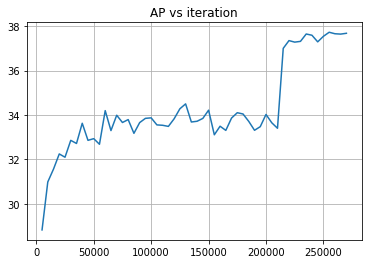

In [14]:
plt.show()
plt.title('AP vs iteration')
plt.grid(True)
plt.plot(df.index, df['AP'].values)

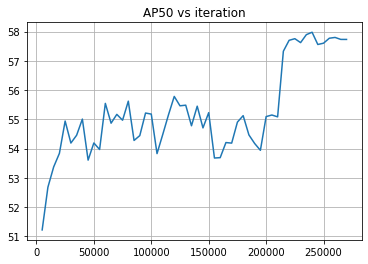

In [15]:
plt.show()
plt.title('AP50 vs iteration')
plt.grid(True)
plt.plot(df.index, df['AP50'].values)

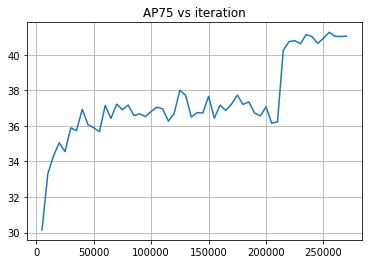

In [16]:
plt.show()
plt.title('AP75 vs iteration')
plt.grid(True)
plt.plot(df.index, df['AP75'].values)